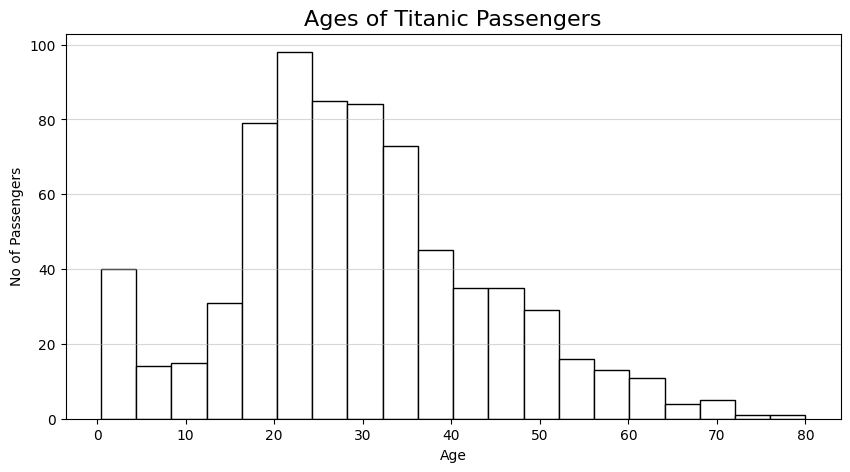

In [79]:
import csv
import matplotlib.pyplot as matplot

ages = []

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        age = row["Age"]
        if age.strip():  
            ages.append(float(age))




matplot.figure(figsize=(10, 5))
matplot.hist(ages, bins=20, color="white", edgecolor="black")
matplot.title("Ages of Titanic Passengers", fontsize=16)
matplot.xlabel("Age")
matplot.ylabel("No of Passengers")

matplot.xticks(range(0, int(max(ages)+10), 10))

matplot.grid(axis="y", linestyle="-", alpha=0.5)

matplot.show()

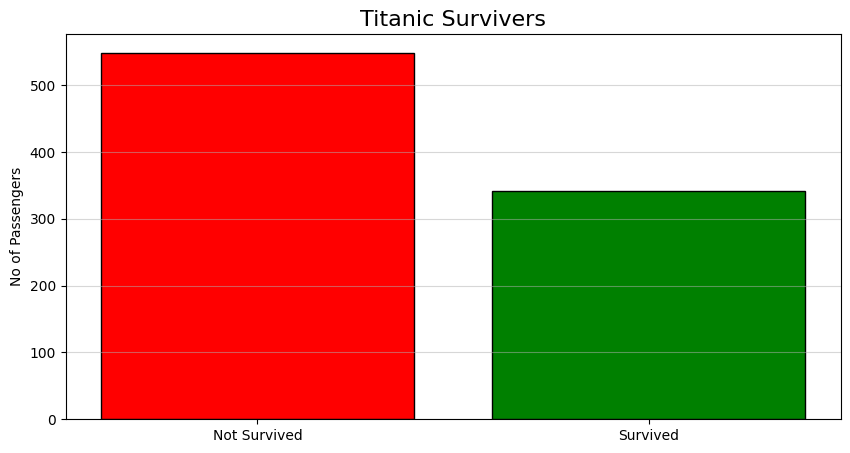

In [80]:
import csv
import matplotlib.pyplot as matplot


survived = 0
not_Survived = 0

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row["Survived"] == "1":
            survived += 1
        elif row["Survived"] == "0":
            not_Survived += 1

labels = ["Not Survived", "Survived"]
counts = [not_Survived, survived]

matplot.figure(figsize=(10, 5))
matplot.bar(labels, counts, color=["red", "green"], edgecolor="black")
matplot.title("Titanic Survivers", fontsize=16)
matplot.ylabel("No of Passengers")
matplot.grid(axis="y", linestyle="-", alpha=0.5)
matplot.show()


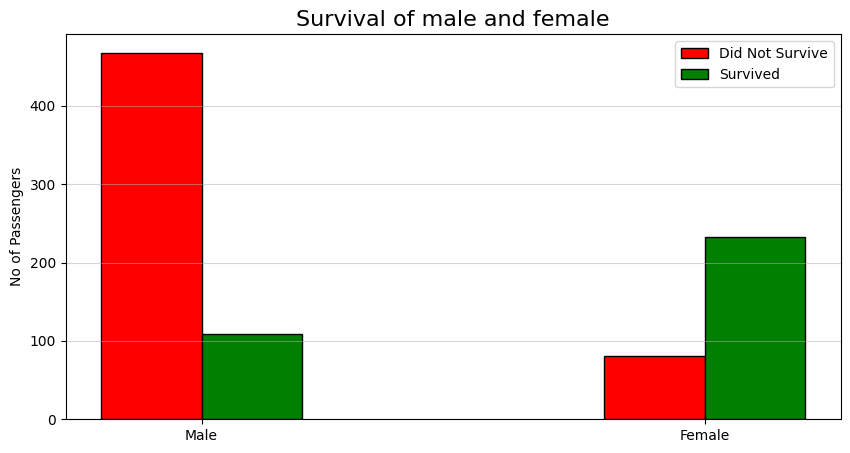

In [81]:
import csv
import matplotlib.pyplot as matplot


maleSurvived = 0
maleNotSurvived = 0
femaleSurvived = 0
femaleNotSurvived = 0

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        sex = row["Sex"].lower()
        survived = row["Survived"]

        if sex == "male":
            if survived == "1":
                maleSurvived += 1
            else:
                maleNotSurvived += 1
        elif sex == "female":
            if survived == "1":
                femaleSurvived += 1
            else:
                femaleNotSurvived += 1

labels = ["Male", "Female"]
survivedCounts = [maleSurvived, femaleSurvived]
notSurvivedCounts = [maleNotSurvived, femaleNotSurvived]

x = range(len(labels))  
barWidth = 0.2       

matplot.figure(figsize=(10, 5))
matplot.bar([p - barWidth/2 for p in x], notSurvivedCounts, 
        width=barWidth, label="Did Not Survive", color="red", edgecolor="black")
matplot.bar([p + barWidth/2 for p in x], survivedCounts, 
        width=barWidth, label="Survived", color="green", edgecolor="black")

matplot.xticks(x, labels)
matplot.title("Survival of male and female", fontsize=16)
matplot.ylabel("No of Passengers")
matplot.legend()
matplot.grid(axis="y", linestyle="-", alpha=0.5)


matplot.show()


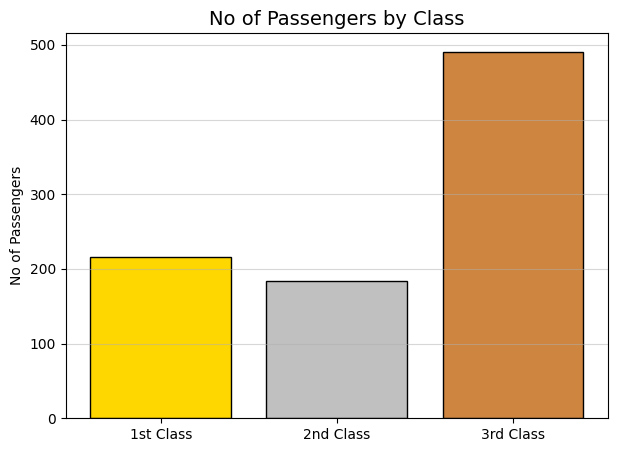

In [82]:
import csv
import matplotlib.pyplot as matplot


passCounts = {"1": 0, "2": 0, "3": 0}

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        pclass = row["Pclass"]
        if pclass in passCounts:
            passCounts[pclass] += 1

classes = ["1st Class", "2nd Class", "3rd Class"]
counts = [passCounts["1"], passCounts["2"], passCounts["3"]]

matplot.figure(figsize=(7, 5))
matplot.bar(classes, counts, color=["gold", "silver", "peru"], edgecolor="black")
matplot.title("No of Passengers by Class", fontsize=14)
matplot.ylabel("No of Passengers")
matplot.grid(axis="y", linestyle="-", alpha=0.5)
matplot.show()



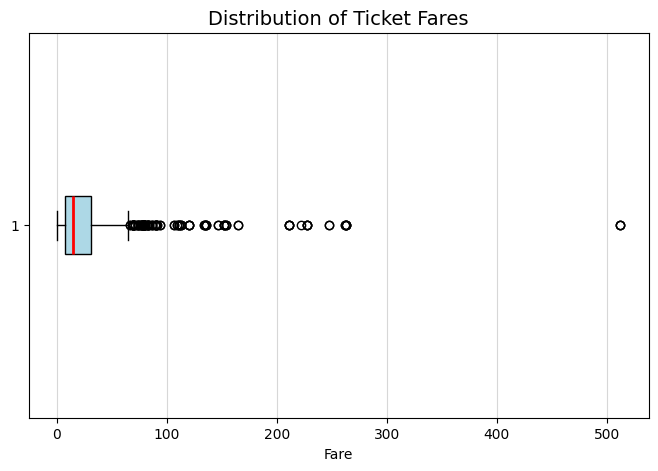

In [83]:
fares = []

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        fare = row["Fare"]
        if fare.strip():  
            fares.append(float(fare))

matplot.figure(figsize=(8, 5))
matplot.boxplot(fares, vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"),
            medianprops=dict(color="red", linewidth=2))
matplot.title("Distribution of Ticket Fares", fontsize=14)
matplot.xlabel("Fare")
matplot.grid(axis="x", linestyle="-", alpha=0.5)
matplot.show()


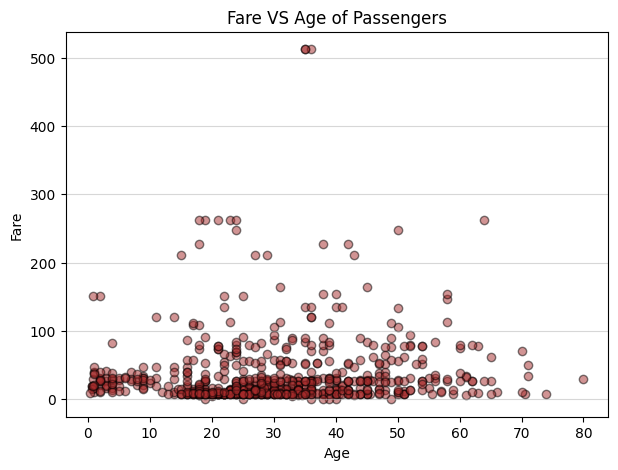

In [84]:
ages, fares = [], []

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        age = row["Age"].strip()
        fare = row["Fare"].strip()
        if age and fare:
            try:
                ages.append(float(age))
                fares.append(float(fare))
            except ValueError:
                pass

matplot.figure(figsize=(7,5))
matplot.scatter(ages, fares, alpha=0.5, c="brown", edgecolors="k")
matplot.title("Fare VS Age of Passengers")
matplot.xlabel("Age")
matplot.ylabel("Fare")

matplot.grid(axis="y", linestyle="-", alpha=0.5)
matplot.show()


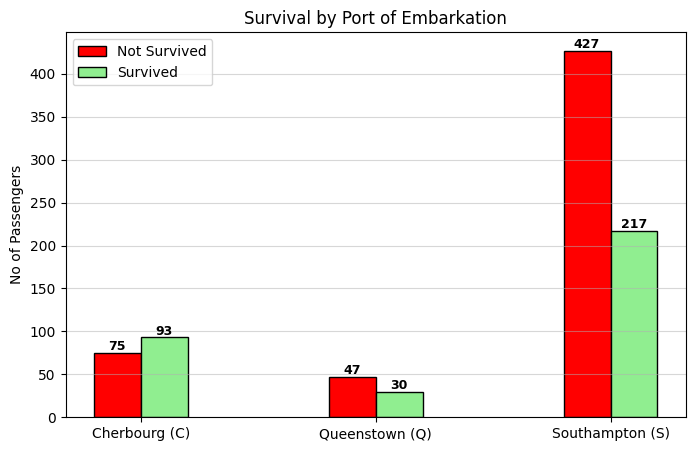

In [85]:
survival_by_port = {"C": {"0": 0, "1": 0},
                    "Q": {"0": 0, "1": 0},
                    "S": {"0": 0, "1": 0}}

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        port = row["Embarked"].strip().upper()
        survived = row["Survived"].strip()
        if port in survival_by_port and survived in ("0", "1"):
            survival_by_port[port][survived] += 1

labels = ["Cherbourg (C)", "Queenstown (Q)", "Southampton (S)"]
notSurvive = [survival_by_port["C"]["0"], survival_by_port["Q"]["0"], survival_by_port["S"]["0"]]
survived = [survival_by_port["C"]["1"], survival_by_port["Q"]["1"], survival_by_port["S"]["1"]]

x = range(len(labels))
barWidth = 0.2

matplot.figure(figsize=(8,5))
matplot.bar([p - barWidth/2 for p in x], notSurvive, width=barWidth, label="Not Survived", color="Red", edgecolor="black")
matplot.bar([p + barWidth/2 for p in x], survived, width=barWidth, label="Survived", color="lightgreen", edgecolor="black")

matplot.xticks(x, labels)
matplot.ylabel("No of Passengers")
matplot.title("Survival by Port of Embarkation")
matplot.legend()

for i, v in enumerate(notSurvive):
    matplot.text(i - barWidth/2, v + 3, str(v), ha="center", fontsize=9, fontweight="bold")
for i, v in enumerate(survived):
    matplot.text(i + barWidth/2, v + 3, str(v), ha="center", fontsize=9, fontweight="bold")

matplot.grid(axis="y", linestyle="-", alpha=0.5)
matplot.show()

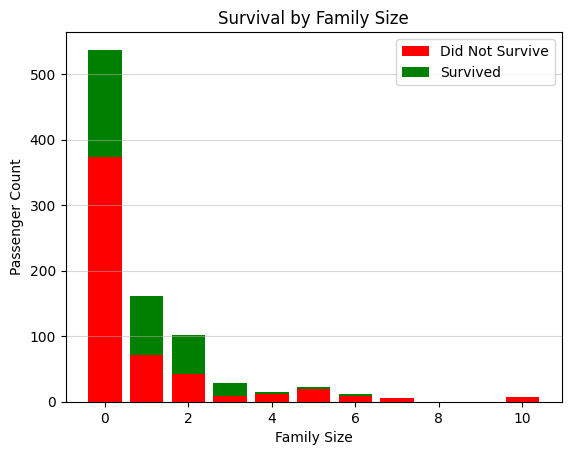

In [86]:
family_size = []
survived = []

with open(r"Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row["SibSp"] and row["Parch"] and row["Survived"]:
            size = int(row["SibSp"]) + int(row["Parch"])
            family_size.append(size)
            survived.append(int(row["Survived"]))

counts = {}
for s, surv in zip(family_size, survived):
    if s not in counts:
        counts[s] = [0, 0]
    counts[s][surv] += 1

sizes = sorted(counts.keys())
did_not_survive = [counts[s][0] for s in sizes]
survived_counts = [counts[s][1] for s in sizes]

matplot.bar(sizes, did_not_survive, label="Did Not Survive", color="red")
matplot.bar(sizes, survived_counts, bottom=did_not_survive, label="Survived", color="green")

matplot.xlabel("Family Size")
matplot.ylabel("Passenger Count")
matplot.title("Survival by Family Size")

matplot.grid(axis="y", linestyle="-", alpha=0.5)
matplot.legend()
matplot.show()

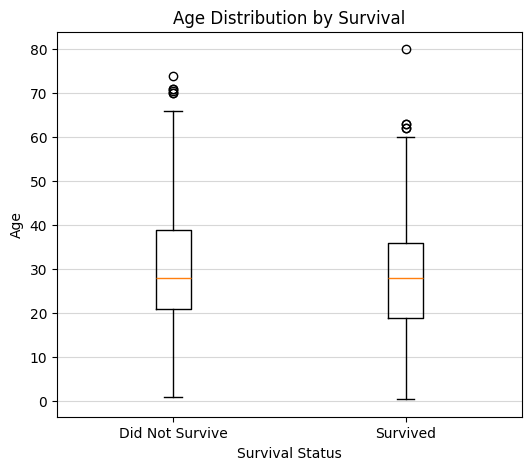

In [87]:
ages_survived = []
ages_not_survived = []

with open(r"Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row["Age"] and row["Survived"]:
            try:
                age = float(row["Age"])
                if row["Survived"] == "1":
                    ages_survived.append(age)
                else:
                    ages_not_survived.append(age)
            except ValueError:
                pass

matplot.figure(figsize=(6,5))
matplot.boxplot([ages_not_survived, ages_survived], tick_labels=["Did Not Survive", "Survived"])
matplot.ylabel("Age")
matplot.xlabel("Survival Status")
matplot.title("Age Distribution by Survival")

matplot.grid(axis="y", linestyle="-", alpha=0.5)
matplot.show()

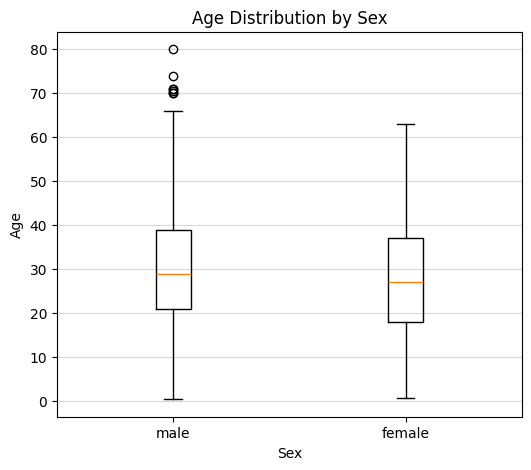

In [88]:
agesMale = []
agesFemale = []

with open(r"Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row["Age"] and row["Sex"]:
            try:
                age = float(row["Age"])
                if row["Sex"].lower() == "male":
                    agesMale.append(age)
                else:
                    agesFemale.append(age)
            except ValueError:
                pass
matplot.figure(figsize=(6,5))
matplot.boxplot([agesMale, agesFemale], tick_labels=["male", "female"])
matplot.ylabel("Age")
matplot.xlabel("Sex")

matplot.grid(axis="y", linestyle="-", alpha=0.5)
matplot.title("Age Distribution by Sex")
matplot.show()

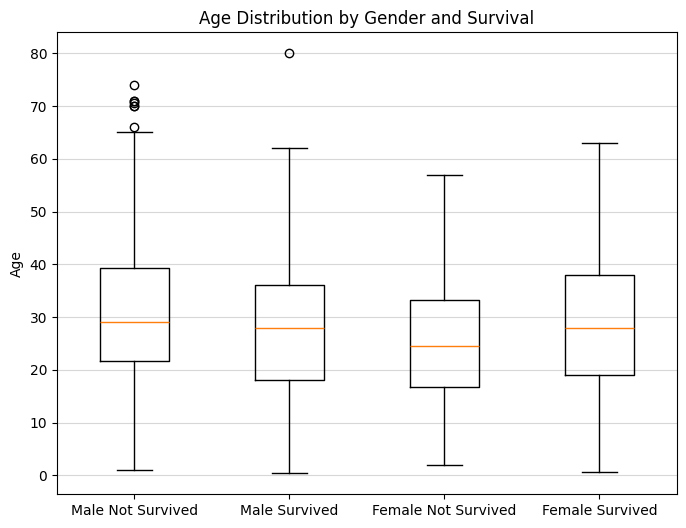

In [89]:
maleSurvived = []
maleNotSurvived = []
femaleSurvived = []
femaleNotSurvived = []

with open(r"Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row["Age"] and row["Sex"] and row["Survived"]:
            try:
                age = float(row["Age"])
                survived = int(row["Survived"])
                if row["Sex"].lower() == "male":
                    if survived == 1:
                        maleSurvived.append(age)
                    else:
                        maleNotSurvived.append(age)
                else:
                    if survived == 1:
                        femaleSurvived.append(age)
                    else:
                        femaleNotSurvived.append(age)
            except ValueError:
                pass

matplot.figure(figsize=(8,6))
matplot.boxplot(
    [maleNotSurvived, maleSurvived, femaleNotSurvived, femaleSurvived],
    tick_labels=["Male Not Survived", "Male Survived", "Female Not Survived", "Female Survived"]
)
matplot.ylabel("Age")
matplot.title("Age Distribution by Gender and Survival")

matplot.grid(axis="y", linestyle="-", alpha=0.5)
matplot.show()

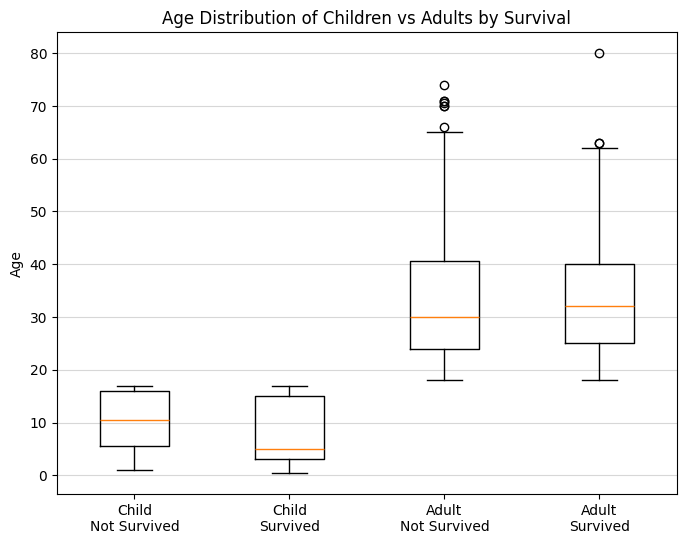

In [90]:
childSurvived = []
childNotSurvived = []
adultSurvived = []
adultNotSurvived = []

with open(r"Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row["Age"] and row["Survived"]:
            try:
                age = float(row["Age"])
                survived = int(row["Survived"])
                if age < 18:
                    if survived == 1:
                        childSurvived.append(age)
                    else:
                        childNotSurvived.append(age)
                else:
                    if survived == 1:
                        adultSurvived.append(age)
                    else:
                        adultNotSurvived.append(age)
            except ValueError:
                pass

matplot.figure(figsize=(8,6))
matplot.boxplot(
    [childNotSurvived, childSurvived, adultNotSurvived, adultSurvived],
    tick_labels=["Child\nNot Survived", "Child\nSurvived", "Adult\nNot Survived", "Adult\nSurvived"]
)
matplot.ylabel("Age")

matplot.grid(axis="y", linestyle="-", alpha=0.5)
matplot.title("Age Distribution of Children vs Adults by Survival")
matplot.show()

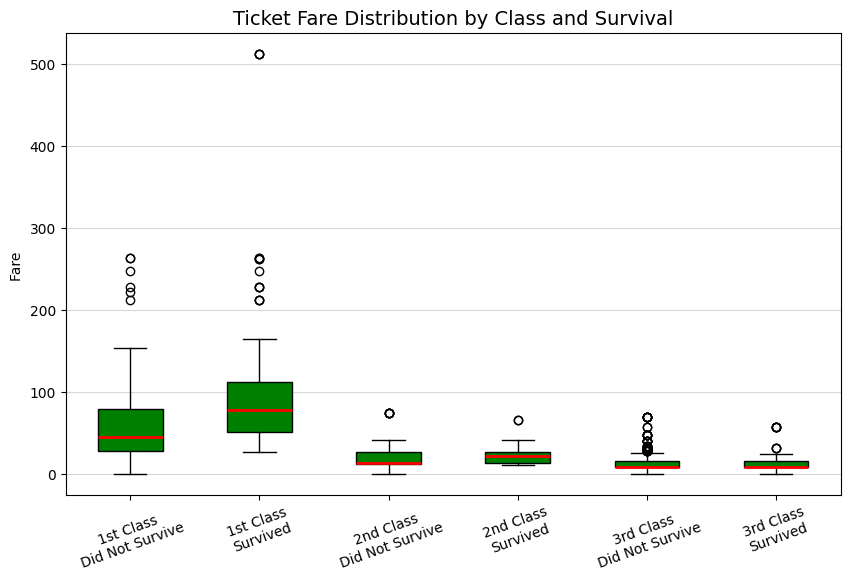

In [91]:
fare_groups = {
    ("1", "0"): [],  
    ("1", "1"): [],  
    ("2", "0"): [],  
    ("2", "1"): [],  
    ("3", "0"): [],  
    ("3", "1"): []   
}


with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        fare = row["Fare"].strip()
        pclass = row["Pclass"]
        survived = row["Survived"]

        if fare:  
            fare_groups[(pclass, survived)].append(float(fare))

data = [
    fare_groups[("1", "0")], fare_groups[("1", "1")],
    fare_groups[("2", "0")], fare_groups[("2", "1")],
    fare_groups[("3", "0")], fare_groups[("3", "1")]
]

labels = [
    "1st Class\nDid Not Survive", "1st Class\nSurvived",
    "2nd Class\nDid Not Survive", "2nd Class\nSurvived",
    "3rd Class\nDid Not Survive", "3rd Class\nSurvived"
]


matplot.figure(figsize=(10, 6))
matplot.boxplot(
    data,
    patch_artist=True,  
    boxprops=dict(facecolor="green", color="black"),
    medianprops=dict(color="red", linewidth=2)
)

matplot.xticks(range(1, len(labels) + 1), labels, rotation=20)
matplot.title("Ticket Fare Distribution by Class and Survival", fontsize=14)
matplot.ylabel("Fare ")
matplot.grid(axis="y", linestyle="-", alpha=0.5)

matplot.show()

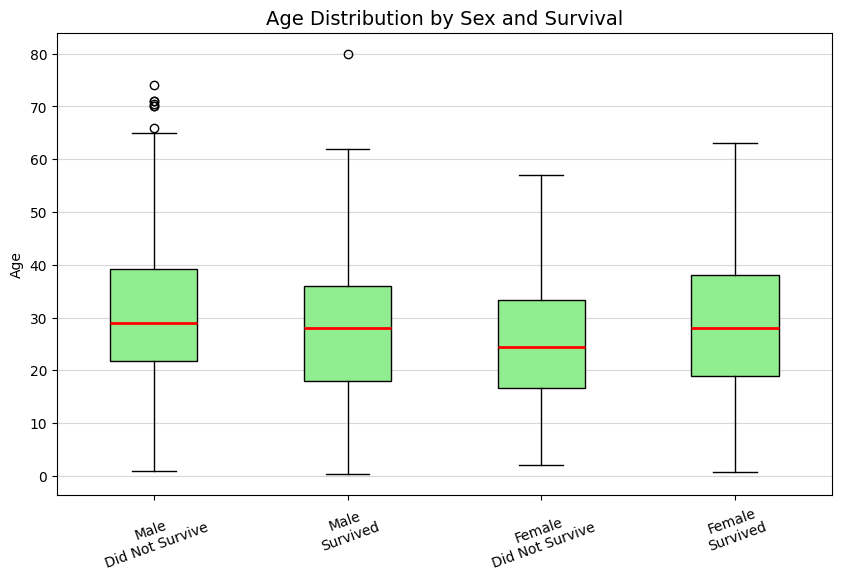

In [92]:
age_groups = {
    ("male", "0"): [],   
    ("male", "1"): [],   
    ("female", "0"): [], 
    ("female", "1"): []  
}

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        age = row["Age"].strip()
        sex = row["Sex"].lower()
        survived = row["Survived"]

        if age:  
            age_groups[(sex, survived)].append(float(age))


data = [
    age_groups[("male", "0")], age_groups[("male", "1")],
    age_groups[("female", "0")], age_groups[("female", "1")]
]

labels = [
    "Male\nDid Not Survive", "Male\nSurvived",
    "Female\nDid Not Survive", "Female\nSurvived"
]


matplot.figure(figsize=(10, 6))
matplot.boxplot(
    data,
    patch_artist=True,
    boxprops=dict(facecolor="lightgreen", color="black"),
    medianprops=dict(color="red", linewidth=2)
)


matplot.xticks(range(1, len(labels) + 1), labels, rotation=20)
matplot.title("Age Distribution by Sex and Survival", fontsize=14)
matplot.ylabel("Age")
matplot.grid(axis="y", linestyle="-", alpha=0.5)

matplot.show()

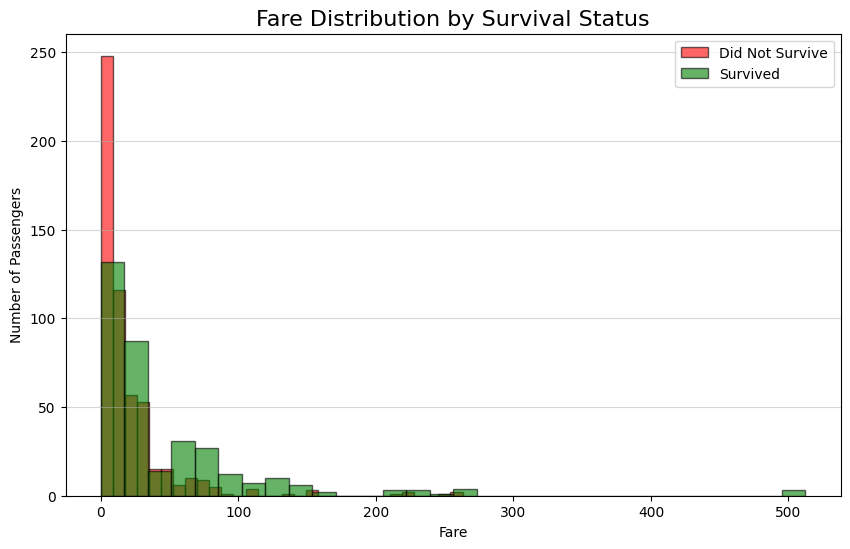

In [93]:
fareSurvived = []
fareNotSurvived = []

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        fare = row["Fare"].strip()
        survived = row["Survived"]

        if fare: 
            if survived == "1":
                fareSurvived.append(float(fare))
            else:
                fareNotSurvived.append(float(fare))

matplot.figure(figsize=(10, 6))

matplot.hist(fareNotSurvived, bins=30, alpha=0.6, label="Did Not Survive", color="red", edgecolor="black")
matplot.hist(fareSurvived, bins=30, alpha=0.6, label="Survived", color="green", edgecolor="black")

matplot.title("Fare Distribution by Survival Status", fontsize=16)
matplot.xlabel("Fare")
matplot.ylabel("Number of Passengers")
matplot.legend()
matplot.grid(axis="y", linestyle="-", alpha=0.5)

matplot.show()

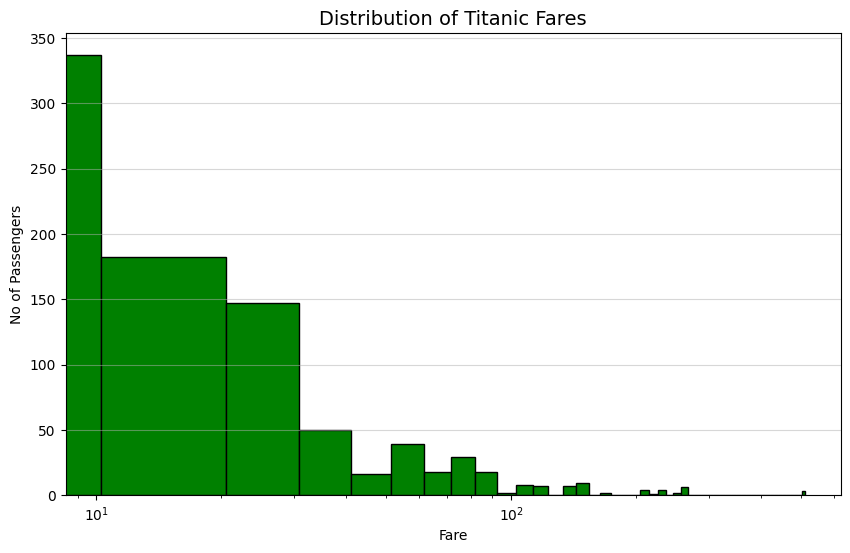

In [94]:
fares = []

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        fare = row["Fare"].strip()
        if fare:  # skip missing
            fares.append(float(fare))

matplot.figure(figsize=(10, 6))
matplot.hist(fares, bins=50, color="green", edgecolor="black")

matplot.xscale("log")

matplot.title("Distribution of Titanic Fares", fontsize=14)
matplot.xlabel("Fare")
matplot.ylabel("No of Passengers")
matplot.grid(axis="y", linestyle="-", alpha=0.5)

matplot.show()

C:\Users\RYZEN\AppData\Local\Temp\ipykernel_27920\600922460.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  matplot.boxplot(data, labels=labels, patch_artist=True,


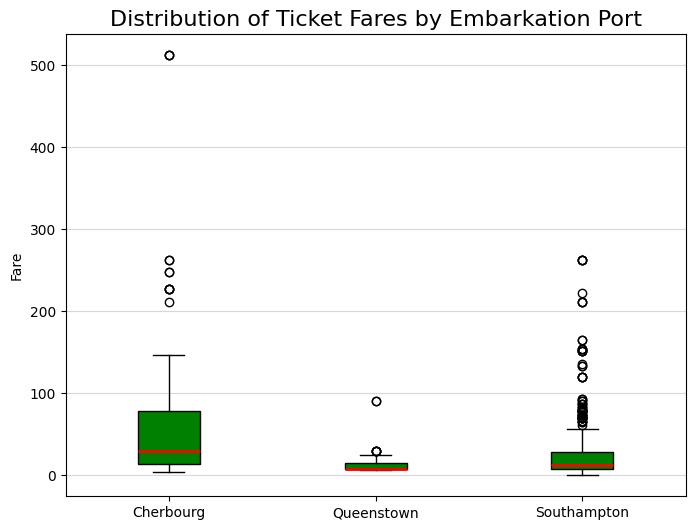

In [95]:
fareByEmbarked = {"C": [], "Q": [], "S": []}

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        fare = row["Fare"].strip()
        embarked = row["Embarked"].strip()
        
        if fare and embarked in fareByEmbarked:  
            fareByEmbarked[embarked].append(float(fare))

data = [fareByEmbarked["C"], fareByEmbarked["Q"], fareByEmbarked["S"]]
labels = ["Cherbourg", "Queenstown", "Southampton"]

matplot.figure(figsize=(8, 6))
matplot.boxplot(data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor="green", color="black"),
            medianprops=dict(color="red", linewidth=2))

matplot.title("Distribution of Ticket Fares by Embarkation Port", fontsize=16)
matplot.ylabel("Fare")
matplot.grid(axis="y", linestyle="-", alpha=0.5)
matplot.show()

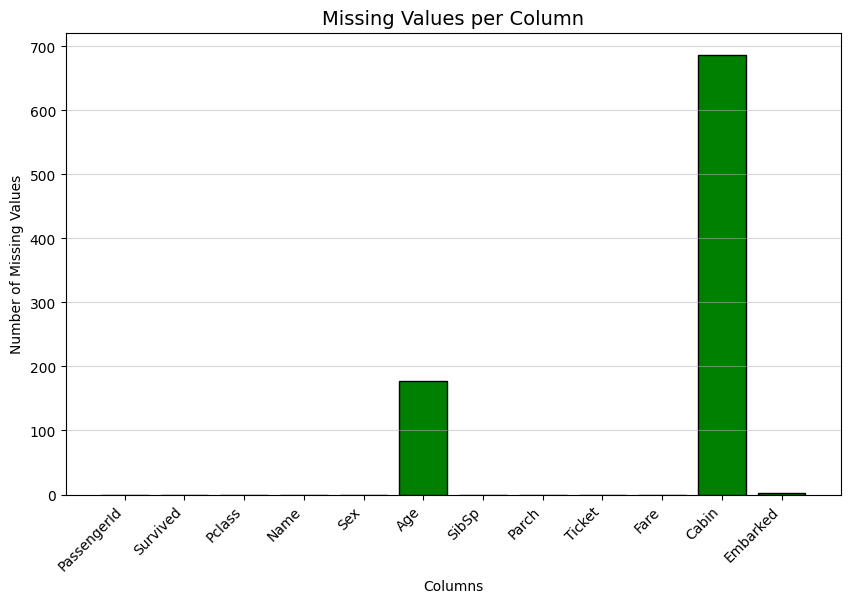

In [96]:
missingCounts = {}

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    columns = reader.fieldnames
    missingCounts = {col: 0 for col in columns}

    for row in reader:
        for col in columns:
            if not row[col].strip():
                missingCounts[col] += 1

cols = list(missingCounts.keys())
counts = list(missingCounts.values())

matplot.figure(figsize=(10, 6))
matplot.bar(cols, counts, color="green", edgecolor="black")

matplot.title("Missing Values per Column", fontsize=14)
matplot.xlabel("Columns")
matplot.ylabel("Number of Missing Values")
matplot.xticks(rotation=45, ha="right")
matplot.grid(axis="y", linestyle="-", alpha=0.5)

matplot.show()

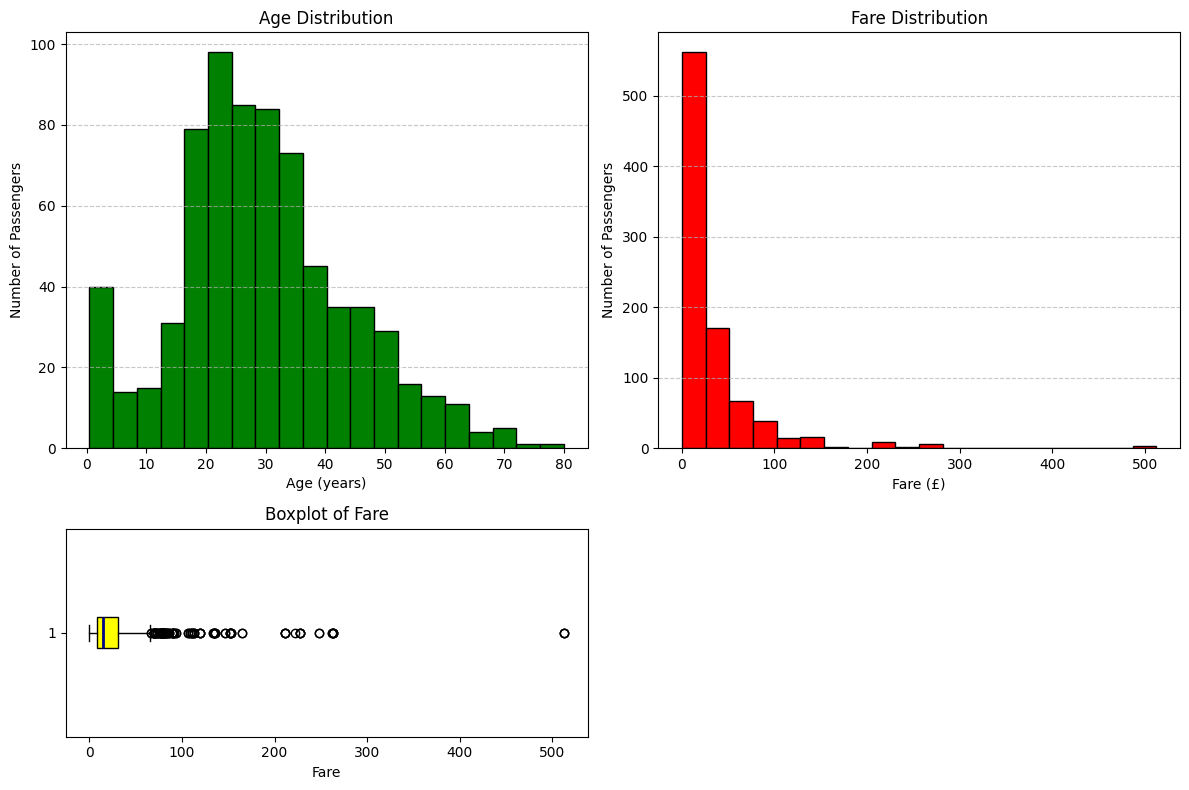

In [97]:
ages = []
fares = []

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        age = row["Age"].strip()
        fare = row["Fare"].strip()

        if age:
            ages.append(float(age))
        if fare:
            fares.append(float(fare))

fig, axs = matplot.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [2, 1]})

axs[0, 0].hist(ages, bins=20, color="green", edgecolor="black")
axs[0, 0].set_title("Age Distribution")
axs[0, 0].set_xlabel("Age (years)")
axs[0, 0].set_ylabel("Number of Passengers")
axs[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

axs[0, 1].hist(fares, bins=20, color="red", edgecolor="black")
axs[0, 1].set_title("Fare Distribution")
axs[0, 1].set_xlabel("Fare (£)")
axs[0, 1].set_ylabel("Number of Passengers")
axs[0, 1].grid(axis="y", linestyle="--", alpha=0.7)

axs[1, 0].boxplot(fares, vert=False, patch_artist=True,
                  boxprops=dict(facecolor="yellow", color="black"),
                  medianprops=dict(color="darkblue", linewidth=2))
axs[1, 0].set_title("Boxplot of Fare")
axs[1, 0].set_xlabel("Fare")
axs[1, 1].axis("off") 

matplot.tight_layout()
matplot.show()

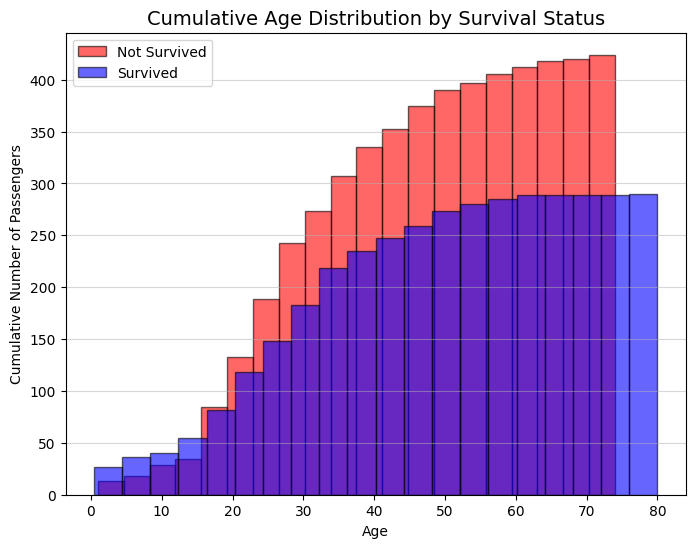

In [98]:
agesSurvived = []
agesNotSurvived = []

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        age = row["Age"].strip()
        survived = row["Survived"].strip()
        if age:
            if survived == "1":
                agesSurvived.append(float(age))
            elif survived == "0":
                agesNotSurvived.append(float(age))

matplot.figure(figsize=(8, 6))

matplot.hist(agesNotSurvived, bins=20, cumulative=True, 
         color="red", alpha=0.6, edgecolor="black", label="Not Survived")

matplot.hist(agesSurvived, bins=20, cumulative=True, 
         color="blue", alpha=0.6, edgecolor="black", label="Survived")

matplot.title("Cumulative Age Distribution by Survival Status", fontsize=14)
matplot.xlabel("Age")
matplot.ylabel("Cumulative Number of Passengers")
matplot.legend()
matplot.grid(axis="y", linestyle="-", alpha=0.5)

matplot.show()

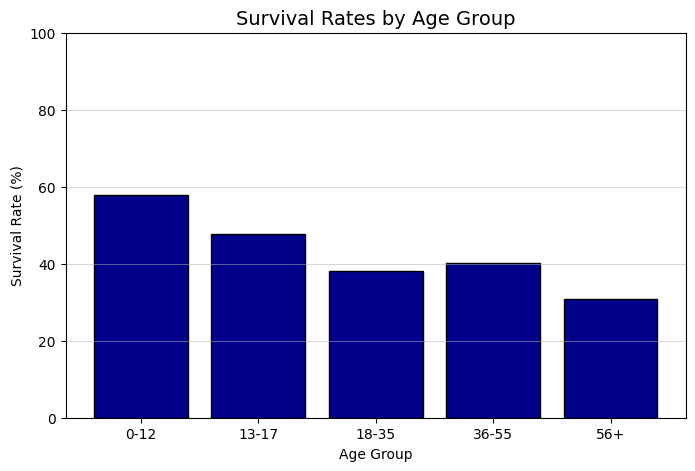

In [99]:
ageBins = {
    "0-12": [0, 12],
    "13-17": [13, 17],
    "18-35": [18, 35],
    "36-55": [36, 55],
    "56+": [56, 120]  
}

ageStats = {group: [0, 0] for group in ageBins}

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        age = row["Age"].strip()
        survived = row["Survived"].strip()

        if age:
            age_val = float(age)
            for group, (low, high) in ageBins.items():
                if (group == "56+" and age_val >= low) or (low <= age_val <= high):
                    ageStats[group][0] += 1  
                    if survived == "1":
                        ageStats[group][1] += 1  

groups = list(ageStats.keys())
survival_rates = [(survived / total * 100) if total > 0 else 0 
                  for group, (total, survived) in ageStats.items()]

matplot.figure(figsize=(8, 5))
matplot.bar(groups, survival_rates, color="darkblue", edgecolor="black")

matplot.title("Survival Rates by Age Group", fontsize=14)
matplot.xlabel("Age Group")
matplot.ylabel("Survival Rate (%)")
matplot.ylim(0, 100)
matplot.grid(axis="y", linestyle="-", alpha=0.5)

matplot.show()

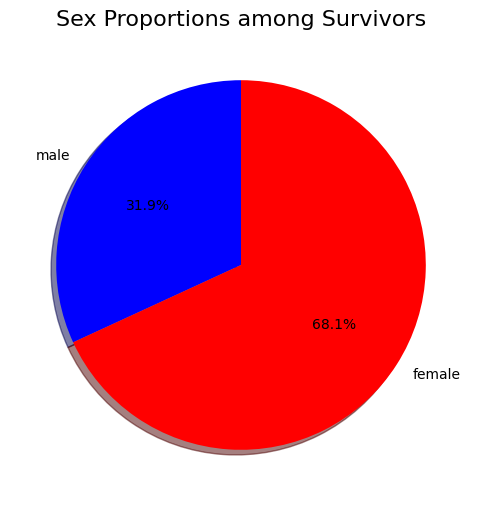

In [100]:
sexCounts = {"male": 0, "female": 0}

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        survived = row["Survived"].strip()
        sex = row["Sex"].strip().lower()

        if survived == "1" and sex in sexCounts:
            sexCounts[sex] += 1

labels = list(sexCounts.keys())
sizes = list(sexCounts.values())
colors = ["blue", "red"]

matplot.figure(figsize=(6, 6))
matplot.pie(sizes, labels=labels, autopct="%1.1f%%", 
        startangle=90, colors=colors, shadow=True)

matplot.title("Sex Proportions among Survivors", fontsize=16)
matplot.show()

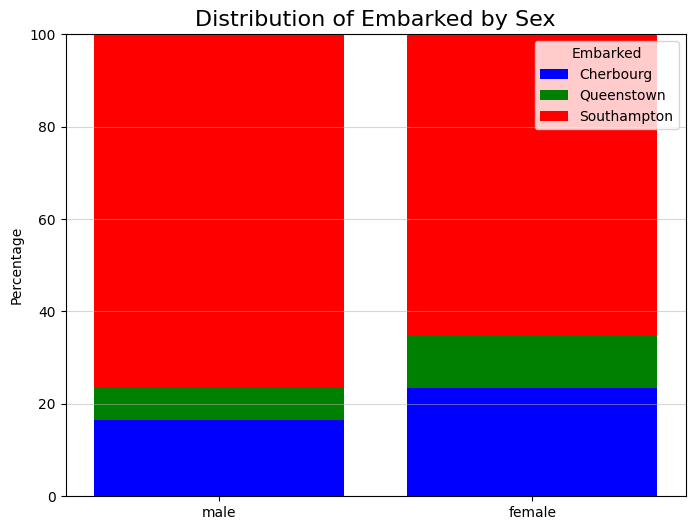

In [101]:
embarkedOptions = ["C", "Q", "S"]
sexEmbarked = {
    "male": {emb: 0 for emb in embarkedOptions},
    "female": {emb: 0 for emb in embarkedOptions}
}

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        sex = row["Sex"].strip().lower()
        embarked = row["Embarked"].strip().upper()
        if sex in sexEmbarked and embarked in embarkedOptions:
            sexEmbarked[sex][embarked] += 1

sexes = list(sexEmbarked.keys())
data_percent = []

for sex in sexes:
    total = sum(sexEmbarked[sex].values())
    percentages = [(count / total * 100) if total > 0 else 0 
                   for count in sexEmbarked[sex].values()]
    data_percent.append(percentages)

C_vals = [data_percent[i][0] for i in range(len(sexes))]
Q_vals = [data_percent[i][1] for i in range(len(sexes))]
S_vals = [data_percent[i][2] for i in range(len(sexes))]

bar_width = 0.5
matplot.figure(figsize=(8, 6))

matplot.bar(sexes, C_vals, label="Cherbourg", color="blue")
matplot.bar(sexes, Q_vals, bottom=C_vals, label="Queenstown", color="green")
matplot.bar(sexes, S_vals, bottom=[c+q for c, q in zip(C_vals, Q_vals)], 
        label="Southampton", color="red")

matplot.title("Distribution of Embarked by Sex", fontsize=16)
matplot.ylabel("Percentage")
matplot.ylim(0, 100)
matplot.legend(title="Embarked")
matplot.grid(axis="y", linestyle="-", alpha=0.5)

matplot.show()

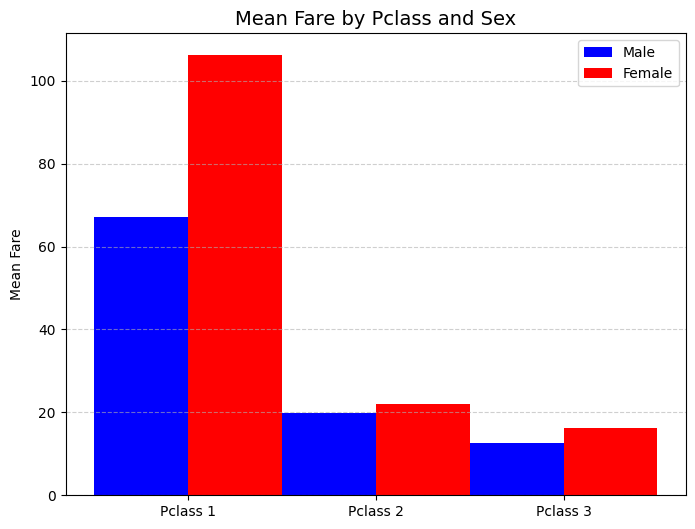

In [102]:
fares = {}

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        pclass = row["Pclass"].strip()
        sex = row["Sex"].strip().lower()
        fare = row["Fare"].strip()

        if pclass and sex and fare:
            key = (pclass, sex)
            if key not in fares:
                fares[key] = []
            fares[key].append(float(fare))

mean_fares = {}
for key, values in fares.items():
    mean_fares[key] = sum(values) / len(values)

pclasses = ["1", "2", "3"]
sexes = ["male", "female"]

male_means = [mean_fares.get((p, "male"), 0) for p in pclasses]
female_means = [mean_fares.get((p, "female"), 0) for p in pclasses]

x = range(len(pclasses))
bar_width = 0.5

matplot.figure(figsize=(8, 6))
matplot.bar([pos - bar_width/2 for pos in x], male_means, 
        width=bar_width, label="Male", color="blue")
matplot.bar([pos + bar_width/2 for pos in x], female_means, 
        width=bar_width, label="Female", color="red")

matplot.xticks(x, [f"Pclass {p}" for p in pclasses])
matplot.ylabel("Mean Fare")
matplot.title("Mean Fare by Pclass and Sex", fontsize=14)
matplot.legend()
matplot.grid(axis="y", linestyle="--", alpha=0.6)

matplot.show()

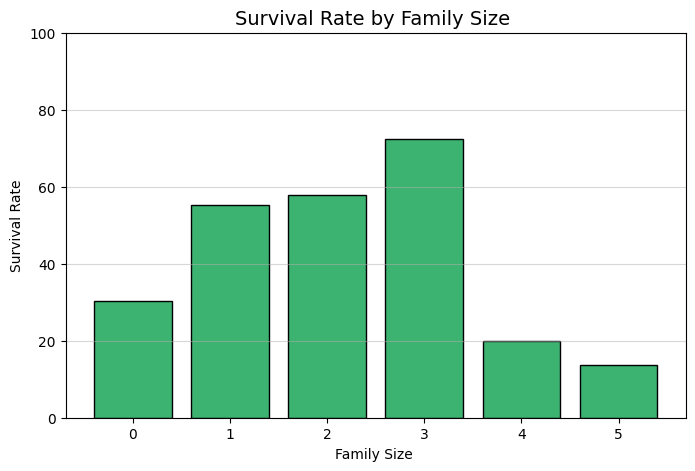

In [103]:
familyData = {} 

with open("Titanic-Dataset.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        sibsp = row["SibSp"].strip()
        parch = row["Parch"].strip()
        survived = row["Survived"].strip()

        if sibsp and parch and survived:
            size = int(sibsp) + int(parch)
            if size <= 5:
                if size not in familyData:
                    familyData[size] = {"survived": 0, "total": 0}
                familyData[size]["total"] += 1
                if survived == "1":
                    familyData[size]["survived"] += 1

sizes = sorted(familyData.keys())
rates = [
    familyData[s]["survived"] / familyData[s]["total"] * 100
    for s in sizes
]

matplot.figure(figsize=(8, 5))
matplot.bar(sizes, rates, color="mediumseagreen", edgecolor="black")

matplot.title("Survival Rate by Family Size ", fontsize=14)
matplot.xlabel("Family Size ")
matplot.ylabel("Survival Rate")
matplot.xticks(sizes)
matplot.ylim(0, 100)
matplot.grid(axis="y", linestyle="-", alpha=0.5)

matplot.show()